In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
grid_of_errors = [[dict() for x in range(20)] for y in range(20)] 


In [3]:
# devo fazer load dos dias todos
files = ['tmp_to_test/with_mobile_data_2018-07-03 13:45:00_6.csv',
        'tmp_to_test/with_mobile_data_2018-07-04 13:30:00_4.csv',
        'tmp_to_test/with_mobile_data_2018-07-05 13:15:00_4.csv',
        'tmp_to_test/with_mobile_data_2018-07-06 14:00:00_6.csv']

for filename in files:
    
    df = pd.read_csv(filename)
    for index, row in df.iterrows():
        if row['lat_grid'] != 'lat_grid':
            #O uso de index deve ser mudado para o timestamp
            grid_of_errors[int(row['lat_grid'])][int(row['long_grid'])][row['start_window']] = row['error_PM2.5']

In [4]:
grid_of_errors[5][12]

{'2018-07-03 13:45:00': '2.8543042839166635',
 '2018-07-03 15:00:00': '0.6926052363254027',
 '2018-07-04 13:30:00': '1.3621846743830273',
 '2018-07-04 14:15:00': '2.1011036465079416',
 '2018-07-05 14:00:00': '3.111022172664209',
 '2018-07-06 14:15:00': '2.3766877242532183',
 '2018-07-06 15:00:00': '-1.7313779636470161'}

In [5]:
maxi = 1
max_i = 0
max_j = 0
for i in range(20):
    for j in range(20):
        if maxi <= len(grid_of_errors[i][j]):
            max_i = i
            max_j = j
            maxi = len(grid_of_errors[i][j])
            print("-----------")
            print ("i: {}\nj: {}\nmax: {} ".format(max_i,max_j, maxi))
            print("-----------")

-----------
i: 0
j: 7
max: 1 
-----------
-----------
i: 0
j: 11
max: 3 
-----------
-----------
i: 1
j: 10
max: 4 
-----------
-----------
i: 2
j: 8
max: 4 
-----------
-----------
i: 2
j: 9
max: 4 
-----------
-----------
i: 2
j: 10
max: 5 
-----------
-----------
i: 3
j: 6
max: 6 
-----------
-----------
i: 4
j: 11
max: 6 
-----------
-----------
i: 4
j: 12
max: 7 
-----------
-----------
i: 5
j: 11
max: 7 
-----------
-----------
i: 5
j: 12
max: 7 
-----------


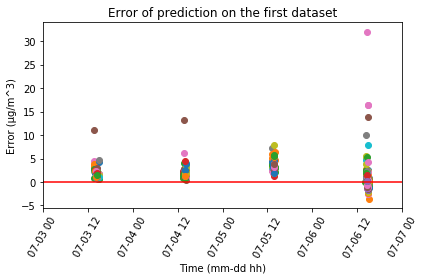

In [6]:
fig, ax = plt.subplots()

for i in range(20):
    for j in range(20):
        x= [ datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(grid_of_errors[i][j].keys()) ]
        y= numbers = [ float(x) for x in list(grid_of_errors[i][j].values())]
        ax.scatter(x, y)
ax.axhline(y=0, color='r', linestyle='-')


plt.xticks(rotation=60)
plt.title('Error of prediction on the first dataset')
plt.ylabel("Error (µg/m^3)")
plt.xlabel("Time (mm-dd hh)")
ax.set_xlim([datetime.strptime('2018-07-03', '%Y-%m-%d'), datetime.strptime('2018-07-07', '%Y-%m-%d')])
fig.tight_layout()
plt.savefig('graphs/daily_error.eps')


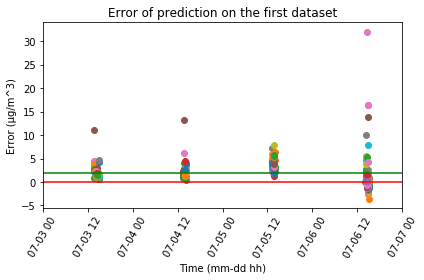

In [7]:
fig, ax = plt.subplots()

for i in range(20):
    for j in range(20):
        x= [ datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(grid_of_errors[i][j].keys()) ]
        y= numbers = [ float(x) for x in list(grid_of_errors[i][j].values())]
        ax.scatter(x, y)
ax.axhline(y=0, color='r', linestyle='-')
ax.axhline(y=1.8683710862957335, color='g', linestyle='-')


plt.xticks(rotation=60)
plt.title('Error of prediction on the first dataset')
plt.ylabel("Error (µg/m^3)")
plt.xlabel("Time (mm-dd hh)")
ax.set_xlim([datetime.strptime('2018-07-03', '%Y-%m-%d'), datetime.strptime('2018-07-07', '%Y-%m-%d')])
fig.tight_layout()
plt.savefig('graphs/daily_error_with_line.eps')


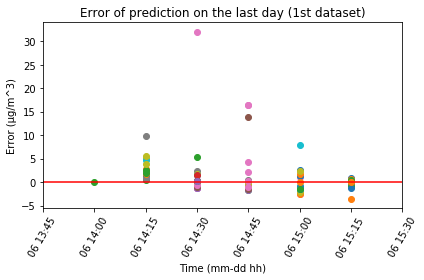

In [8]:
fig, ax = plt.subplots()

for i in range(20):
    for j in range(20):
        x= [ datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(grid_of_errors[i][j].keys()) ]
        y= numbers = [ float(x) for x in list(grid_of_errors[i][j].values())]
        ax.scatter(x, y)
ax.axhline(y=0, color='r', linestyle='-')
plt.xticks(rotation=60)
plt.title('Error of prediction on the last day (1st dataset)')
plt.ylabel("Error (µg/m^3)")
plt.xlabel("Time (mm-dd hh)")
ax.set_xlim([datetime.strptime('2018-07-06 13:45:00', '%Y-%m-%d %H:%M:%S'), datetime.strptime('2018-07-06 15:30:00', '%Y-%m-%d %H:%M:%S')])
fig.tight_layout()
plt.savefig('graphs/hourly_error.eps')

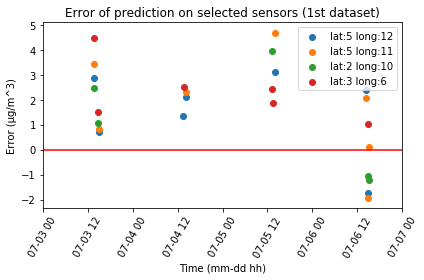

In [9]:
cells=[(5,12),(5,11),(2,10),(3,6)]
fig, ax = plt.subplots()

for i, j in cells:
        x= [ datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(grid_of_errors[i][j].keys()) ]
        y= [ float(x) for x in list(grid_of_errors[i][j].values()) ]
        ax.scatter(x, y, label="lat:{} long:{}".format(i, j))

ax.axhline(y=0, color='r', linestyle='-')
ax.legend(loc='best')
plt.title('Error of prediction on selected sensors (1st dataset)')
plt.ylabel("Error (µg/m^3)")
plt.xlabel("Time (mm-dd hh)")
plt.xticks(rotation=60)
ax.set_xlim([datetime.strptime('2018-07-03', '%Y-%m-%d'), datetime.strptime('2018-07-07', '%Y-%m-%d')])
fig.tight_layout()
plt.savefig('graphs/daily_error_selected_sensors.eps')


In [10]:
error=[]
for i in range(20):
    for j in range(20):
                error.extend([ float(x) for x in list(grid_of_errors[i][j].values())])

In [11]:
np.mean(error)

1.8683710862957335

In [12]:
error_2 = [x - np.mean(error) for x in error]

In [16]:
print(np.sum([abs(x) for x in error]))
print(np.sum([abs(x) for x in error_2]))

840.8204856343921
579.7213771888029


In [179]:
len(error)

369